# TP 5-6 : implémentation de la recherche de circuit eulérien

Dans ce TP, l'objectif est d'implémenter la recherche d'un circuit eulérien, dans des graphes orientés. 

La représentation choisie pour les graphes est une matrice d'adjacence, qui sera représentée par un tableau de tableau (les noms des sommets sont des entiers et seront numérotés en commençant à 0). Nous considérons que le nombre de sommets du graphe ne pourra pas être modifié une fois le graphe construit.

### Import des modules utiles

In [40]:
%pip install numpy
import numpy as np
from copy import deepcopy

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


## Définition des fonctions pour la visualisation des graphes (cellules de code données --> rien à compléter)

### Installation de graphviz pour pouvoir visualiser les graphes

In [41]:
%pip install graphviz
import graphviz
graphviz.__version__, graphviz.version()

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



('0.20.1', (9, 0, 0))

### Création d'une fonction de conversion d'un graphe, défini par une matrice d'adjacence, vers le format graphviz

In [42]:
def creation_graphe_graphviz(g):
    # création d'un graphe orienté
    dot = graphviz.Digraph()
    
    # ajout des sommets
    for i in range(len(g)):
        dot.node(str(i))
    
    # ajout des arcs
    for i in range(len(g)):
        for j in range(len(g)):
            if g[i][j] == 1:
                dot.edge(str(i), str(j))
    
    return dot

### Création de graphes eulériens et non eulériens, pour tester les fonctions

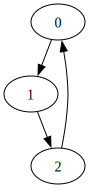

In [43]:
graphe1eulerien = np.array([[0,1,0],
                  [0,0,1],
                  [1,0,0]])
gdot1eulerien = creation_graphe_graphviz(graphe1eulerien)
gdot1eulerien

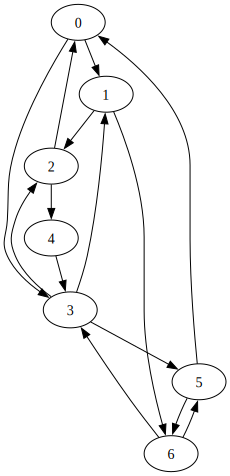

In [44]:
graphe2eulerien = np.array([[0,1,0,1,0,0,0],
                  [0,0,1,0,0,0,1],
                  [1,0,0,0,1,0,0],
                  [0,1,1,0,0,1,0],
                  [0,0,0,1,0,0,0],
                  [1,0,0,0,0,0,1],
                  [0,0,0,1,0,1,0]])
gdot2eulerien = creation_graphe_graphviz(graphe2eulerien)
gdot2eulerien

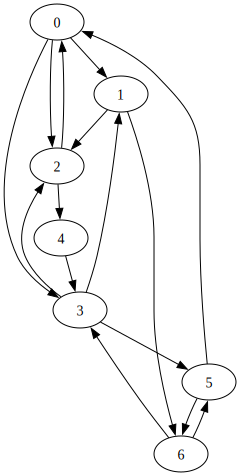

In [45]:
graphe3noneulerien = np.array([[0,1,1,1,0,0,0],
                  [0,0,1,0,0,0,1],
                  [1,0,0,0,1,0,0],
                  [0,1,1,0,0,1,0],
                  [0,0,0,1,0,0,0],
                  [1,0,0,0,0,0,1],
                  [0,0,0,1,0,1,0]])
gdot3noneulerien = creation_graphe_graphviz(graphe3noneulerien)
gdot3noneulerien

## Définition des fonctions utiles pour manipuler les graphes (fonctions données)

#### Fonction qui construit un graphe vide (sans arcs), avec le nombre de sommets donné, et qui retourne la matrice d'adjacence correspondante

In [46]:
def graphe_vide(n):
    return np.zeros((n, n))

#### Fonction qui retourne vrai si l'arc, dont les numéros de sommets extrémités sont donnés, existe

In [47]:
def est_arc(g, i, j):
    return g[i][j] == 1


#### Fonction qui ajoute un arc au graphe, s'il n'est pas déjà présent

In [48]:
def ajoute_arc(g, i, j):
    g[i][j] = 1

#### Fonction qui ote un arc du graphe, s'il était déjà présent

In [49]:
def ote_arc(g, i, j):
    g[i][j] = 0

#### Fonction qui retourne le nombre de sommets du graphe

In [50]:
def nb_sommets(g):
    return len(g)

#### Fonction qui retourne le degré entrant du sommet donné

In [51]:
def degre_entrant(g, s):
    return sum(g[:,s])

#### Fonction qui retourne le degré sortant du sommet donné

In [52]:
def degre_sortant(g, s):
    return sum(g[s,:])

#### Fonction qui retourne le degré total du sommet donné

In [53]:
def degre_total(g, s):
    return degre_entrant(g,s) + degre_sortant(g,s)

#### Fonction qui retourne les degrés entrants des sommets du graphe, sous la forme d'un tableau

In [54]:
def degres_entrants(g):
    return [degre_entrant(g,i) for i in range(nb_sommets(g))]

#### Fonction qui retourne les degrés sortants des sommets du graphe, sous la forme d'un tableau

In [55]:
def degres_sortants(g):
    return [degre_sortant(g,i) for i in range(nb_sommets(g))]

#### Fonction qui retourne les degrés totaux des sommets du graphe, sous la forme d'un tableau

In [56]:
def degres_totaux(g):
    return [degre_total(g,i) for i in range(nb_sommets(g))]

#### Fonction qui retourne un tableau contenant les noms des sommets successeurs du sommet donné

In [57]:
def successeurs(g,s):
    return [i for i in range(len(g)) if g[s][i] == 1]

#### Fonction qui retourne un tableau contenant les noms des sommets prédécesseurs du sommet donné

In [58]:
def predecesseurs(g,s):
    return [i for i in range(len(g)) if g[i][s] == 1]

#### Fonction qui indique si la liste des sommets donnés correspond à un chemin, dans le graphe donné

In [59]:
def est_chemin(g, ls):
    # un chemin peut être vide ou ne contenir qu'un sommet
    if len(ls) < 2:
        return True
    
    for i in range(len(ls)-1):
        if not(est_arc(g,ls[i],ls[i+1])):
            return False
        
    return True

#### Fonction qui indique si la liste des sommets donnés correspond à un circuit, dans le graphe donné

In [60]:
def est_circuit(g, ls):
    # un circuit contient au moins 2 sommets
    if len(ls) < 2:
        return False
    else: 
        return est_chemin(g,ls) and (ls[0] == ls[len(ls)-1])

#### Fonction qui retourne la matrice d'adjacence correspondant au graphe symétrique du graphe donné

In [61]:
def graphe_symetrique(g):
    sym = graphe_vide(nb_sommets(g))
    for i in range(len(g)):
        for j in range(len(g)):
            if g[i][j] == 1:
                ajoute_arc(sym, i, j)
                ajoute_arc(sym, j, i)
    return sym

#### Fonction qui retourne un tableau contenant les noms des sommets voisins du sommet donné

In [62]:
def voisins(g,s):
    v = []
    for i in range(len(g)):
        if g[i][s]==1 or g[s][i]==1:
            v.append(i)
    return v

#### Fonction qui donne l'ensemble des sommets descendants du sommet d'indice donné

In [63]:
def descendants(g, s):
    descs = set()
    file = []
    
    file.append(s)
    while len(file) > 0:
        scour = file[0]
        file = file[1:]
        succs = successeurs(g, scour)
        for i in range(len(succs)):
            if(succs[i] not in descs):
                file.append(succs[i])
                descs.add(succs[i])
    
    return descs

#### Fonction qui donne l'ensemble des sommets ascendants du sommet d'indice donné

In [64]:
def ascendants(g, s):
    ascs = set()
    file = []
    
    file.append(s)
    while len(file) > 0:
        scour = file[0]
        file = file[1:]
        preds = predecesseurs(g, scour)
        for i in range(len(preds)):
            if(preds[i] not in ascs):
                file.append(preds[i])
                ascs.add(preds[i])
                
    return ascs

#### Fonction qui donne la composante fortement connexe du sommet s, sous la forme d'un ensemble de sommets

In [65]:
def cfc_sommet(g, s):
    # intersection des ascendants et des descendants du sommet s
    ascs = ascendants(g, s)
    descs = descendants(g, s)
    cfc = set([x for x in ascs if x in descs])

    # ajout du sommet s'il ne fait pas partie ses ascendants et/ou descendants
    if s not in cfc:
        cfc.add(s)
    
    return cfc

#### Fonction qui donne la liste des composantes fortement connexes du graphe, sous la forme d'une liste d'ensembles de sommets

In [66]:
def cfc_graphe(g):
    lcfc = []
    
    for i in range(len(g)):
        cfc = cfc_sommet(g, i)
        if cfc not in lcfc:
            lcfc.append(cfc)
        
    return lcfc

#### Fonction qui donne la liste des composantes connexes du graphe, sous la forme d'une liste d'ensembles de sommets

In [67]:
def cc_graphe(g):
    # création du graphe symétrique correspondant à g, pour "simuler" son graphe non orienté associé
    gs = graphe_symetrique(g)
    
    return cfc_graphe(gs)

#### Fonction qui retourne vrai si le graphe est connexe

In [68]:
def est_connexe(g):
    return len(cc_graphe(g)) == 1

## Définition des fonctions à écrire

#### `nombre_arcs(graphe)` : retourne le nombre d'arcs présents dans le graphe `graphe`

In [71]:
def nombre_arcs(graphe):
    compteur = 0
    for i in range(len(graphe)):
        for j in range(len(graphe[i])):
            if est_arc(graphe, i, j):
                compteur += 1
    return compteur
    # raise NotImplementedError

In [72]:
## test de la fonction nombre_arcs
print("le graphe graphe1eulerien comporte", nombre_arcs(graphe1eulerien), "arcs") #3 arcs
print("le graphe graphe2eulerien comporte", nombre_arcs(graphe2eulerien), "arcs") #14 arcs

le graphe graphe1eulerien comporte 3 arcs
le graphe graphe2eulerien comporte 14 arcs


#### `est_graphe_eulerien(graphe)` : vérifie que `graphe` est un graphe eulérien, en utilisant le théorème d'Euler

In [90]:
def est_graphe_eulerien(graphe):
    for i in graphe:
        nb_degree = degre_total(graphe, i).sum()
        if nb_degree % 2 != 0 : 
            return False
            
    return True
    # raise NotImplementedError

In [91]:
## test de la fonction est_graphe_eulerien
print("graphe1eulerien est eulérien ? ", est_graphe_eulerien(graphe1eulerien)) #vrai
print("graphe2eulerien est eulérien ? ", est_graphe_eulerien(graphe2eulerien)) #vrai
print("graphe3noneulerien est eulérien ? ", est_graphe_eulerien(graphe3noneulerien)) #faux

graphe1eulerien est eulérien ?  True
graphe2eulerien est eulérien ?  True
graphe3noneulerien est eulérien ?  False


#### `indice_premier_sommet_avec_successeur(graphe, circuit)` : retourne l'indice du premier sommet de `circuit` qui a au moins un successeur dans `graphe`.

In [96]:
def indice_premier_sommet_avec_successeur(graphe, circuit):
    for i in range(len(circuit)) :
        if len(successeurs(graphe, circuit[i])) != 0 : 
            return i
    return -1
    # raise NotImplementedError

In [97]:
## test de la fonction indice_premier_sommet_avec_successeur
print(indice_premier_sommet_avec_successeur(graphe2eulerien, [3, 1, 3])) #sommet 0

0


#### `construit_circuit_simple_algo_eulerien(graphe, s)` : construit un circuit simple, à partir du sommet `s`, pour l'algorithme de recherche d'un circuit eulérien (c'est-à-dire après s'être assuré qu'un circuit eulérien existait dans le graphe) et retourne ce circuit. On supprime également du graphe les arcs correspondant à ce circuit, au fur et à mesure de leur sélection.

In [98]:
def construit_circuit_simple_algo_eulerien(graphe_copie, s):
    # initialisation du circuit avec le sommet s
    circuit = [s]
    
    # boucle à exécuter tant qu'on ne revient pas 
    # sur le sommet s
    scour = s
    while (scour != s or len(circuit) < 2):
        # on concatène le premier successeur de scour,
        # au circuit, puis on supprime l'arc correspondant 
        # (pour ne plus pouvoir le sélectionner de nouveau) 
        # et on met à jour scour
        
        # TODO : code à compléter #
        next_successeur = successeurs(graphe_copie, scour)[0]
        circuit.append(next_successeur)
        graphe_copie[scour][next_successeur] = 0
        scour = next_successeur
        
        print("--> circuit simple en cours de construction :", circuit)
        
    return circuit


 [[0 1 0]
 [0 0 1]
 [1 0 0]]
--> circuit simple en cours de construction : [0, 1]
--> circuit simple en cours de construction : [0, 1, 2]
--> circuit simple en cours de construction : [0, 1, 2, 0]
circuit simple à partir du sommet 0 : [0, 1, 2, 0]


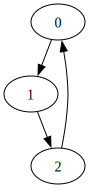

In [99]:
## test de la fonction construit_circuit_simple_algo_eulerien

# on copie le graphe pour pouvoir supprimer des arcs, lors de la recherche
# d'un circuit simple, sans modifier le graphe en paramètre
gtemp1 = deepcopy(graphe1eulerien)
print("\n", gtemp1)
#print('successeurs de 1 :', successeurs(graphe1eulerien, 1))
print("circuit simple à partir du sommet 0 :", construit_circuit_simple_algo_eulerien(gtemp1, 0))
# circuit à afficher : [0, 1, 2, 0]

gdot1eulerien


 [[0 1 0 1 0 0 0]
 [0 0 1 0 0 0 1]
 [1 0 0 0 1 0 0]
 [0 1 1 0 0 1 0]
 [0 0 0 1 0 0 0]
 [1 0 0 0 0 0 1]
 [0 0 0 1 0 1 0]]
--> circuit simple en cours de construction : [3, 1]
--> circuit simple en cours de construction : [3, 1, 2]
--> circuit simple en cours de construction : [3, 1, 2, 0]
--> circuit simple en cours de construction : [3, 1, 2, 0, 1]
--> circuit simple en cours de construction : [3, 1, 2, 0, 1, 6]
--> circuit simple en cours de construction : [3, 1, 2, 0, 1, 6, 3]
circuit simple à partir du sommet 3 : [3, 1, 2, 0, 1, 6, 3]


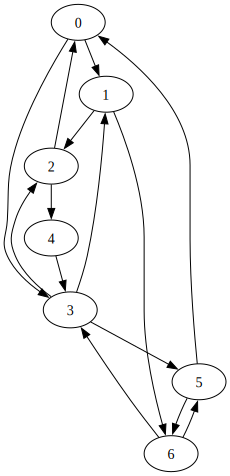

In [100]:
## test de la fonction construit_circuit_simple_algo_eulerien

# on copie le graphe pour pouvoir supprimer des arcs, lors de la recherche
# d'un circuit simple, sans modifier le graphe en paramètre
gtemp2 = deepcopy(graphe2eulerien)
print("\n", gtemp2)
#print('successeurs de 1 :', successeurs(graphe1eulerien, 1))
print("circuit simple à partir du sommet 3 :", construit_circuit_simple_algo_eulerien(gtemp2, 3))
# circuit à afficher : [3, 1, 2, 0, 1, 6, 3]

gdot2eulerien


#### `construit_circuit_eulerien(graphe)` : construit un circuit eulérien, à partir du graphe donné (après s'être assuré que ce graphe était bien eulérien).

In [122]:
def construit_circuit_eulerien(graphe):
    # on vérifie que le graphe est bien connexe et eulérien
    # TODO : code à compléter #
    
    # on copie le graphe pour pouvoir supprimer des arcs, lors de la recherche
    # d'un circuit simple, sans modifier le graphe en paramètre
    gtemp = deepcopy(graphe)
    
    # initialisation de l'algorithme (comme le graphe est connexe, on est sûr
    # que chaque sommet a au moins 1 successeur et 1 prédécesseur donc on peut
    # commencer avec le sommet 0)
    circuit = construit_circuit_simple_algo_eulerien(gtemp, 0)
    print("circuit initial :", circuit)
    
    # recherche d'un circuit simple à insérer dans le circuit courant, jusqu'à
    # avoir utilisé tous les arcs du graphe
    while nombre_arcs(gtemp) > 0:
        print("\n nombre d'arcs restant à ajouter au circuit eulérien :", nombre_arcs(gtemp))
        
        # TODO : code à compléter
        indice = circuit[indice_premier_sommet_avec_successeur(graphe, circuit)]
        circuit_simple = construit_circuit_simple_algo_eulerien(graphe, graphe[indice])
        insert_pos = circuit.index(circuit_simple[0])-1
        circuit = circuit[:insert_pos] + circuit_simple + circuit[insert_pos:]
        
        print("--> circuit eulérien en cours de construction :", circuit)
    
    return circuit

In [123]:
## test de la fonction construit_circuit_eulerien

print(graphe1eulerien, "\n")
print("\n ==> circuit eulérien de graphe1eulerien :", construit_circuit_eulerien(graphe1eulerien), "\n")
# circuit à afficher : [0, 1, 2, 0]
#print(graphe1eulerien)


[[0 1 0]
 [0 0 1]
 [1 0 0]] 

--> circuit simple en cours de construction : [0, 1]
--> circuit simple en cours de construction : [0, 1, 2]
--> circuit simple en cours de construction : [0, 1, 2, 0]
circuit initial : [0, 1, 2, 0]

 ==> circuit eulérien de graphe1eulerien : [0, 1, 2, 0] 



In [124]:
## test de la fonction construit_circuit_eulerien

print(graphe2eulerien, "\n")
print("\n ==> circuit eulérien de graphe2eulerien :", construit_circuit_eulerien(graphe2eulerien), "\n")
# circuit à afficher : [0, 3, 1, 6, 5, 6, 3, 2, 4, 3, 5, 0, 1, 2, 0]
#print(graphe2eulerien)

[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]] 



IndexError: list index out of range

## Implémentation des fonctions bonus (cellules de code à compléter)

#### `est_graphe_semi_eulerien(graphe)` : vérifie que `graphe` est un graphe semi-eulérien, en utilisant le théorème d'Euler 

In [ ]:
def est_graphe_semi_eulerien(graphe):
    raise NotImplementedError

In [ ]:
## test de la fonction est_graphe_semi_eulerien

#### `construit_chemin_eulerien(graphe)` : construit un chemin eulérien, à partir du graphe donné (après s'être assuré que ce graphe était bien semi-eulérien).

In [ ]:
def construit_chemin_eulerien(graphe):
    raise NotImplementedError

In [ ]:
## test de la fonction construit_chemin_eulerien